# Evaluation Project - 10 Insurance Claims- Fraud Detection

# Problem Statement:
> # Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Imorting all the necessary libraries:

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# load the data set:

In [5]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Description:
There are 40 columns and 100 rows in ehich fraud_reported column is taken as target variable and rest all are considered as features .
This model is classification model since we need to predict whether there is insurance fraud exists or not .

In [6]:
df=df.drop(columns=['_c39'])# remmoving the unwanted columns(empty)

In [6]:
df.shape# checking the dimension of the set

(1000, 39)

In [7]:
df.info()# getting the nonnull count and dtype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.isnull().sum()# checking the null values of the set

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
df['fraud_reported'].value_counts()# getting counts of target variable values

N    753
Y    247
Name: fraud_reported, dtype: int64

# Describing the data:

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Label Encoder:

In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['fraud_reported']=LE.fit_transform(df['fraud_reported'])
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Checking the count of yes and no fraud detected for target variable:

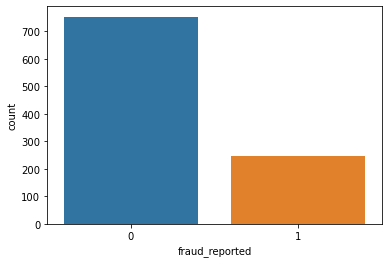

In [9]:
sns.countplot(x='fraud_reported',data=df)
plt.show()

> Here, there exists some imbalance of data which can be resolved using some techniques in the model building phase.

# OrdinalEncoder:
this is used to convert all the object data of features to numerical for ease of further process.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))

# Correlation:

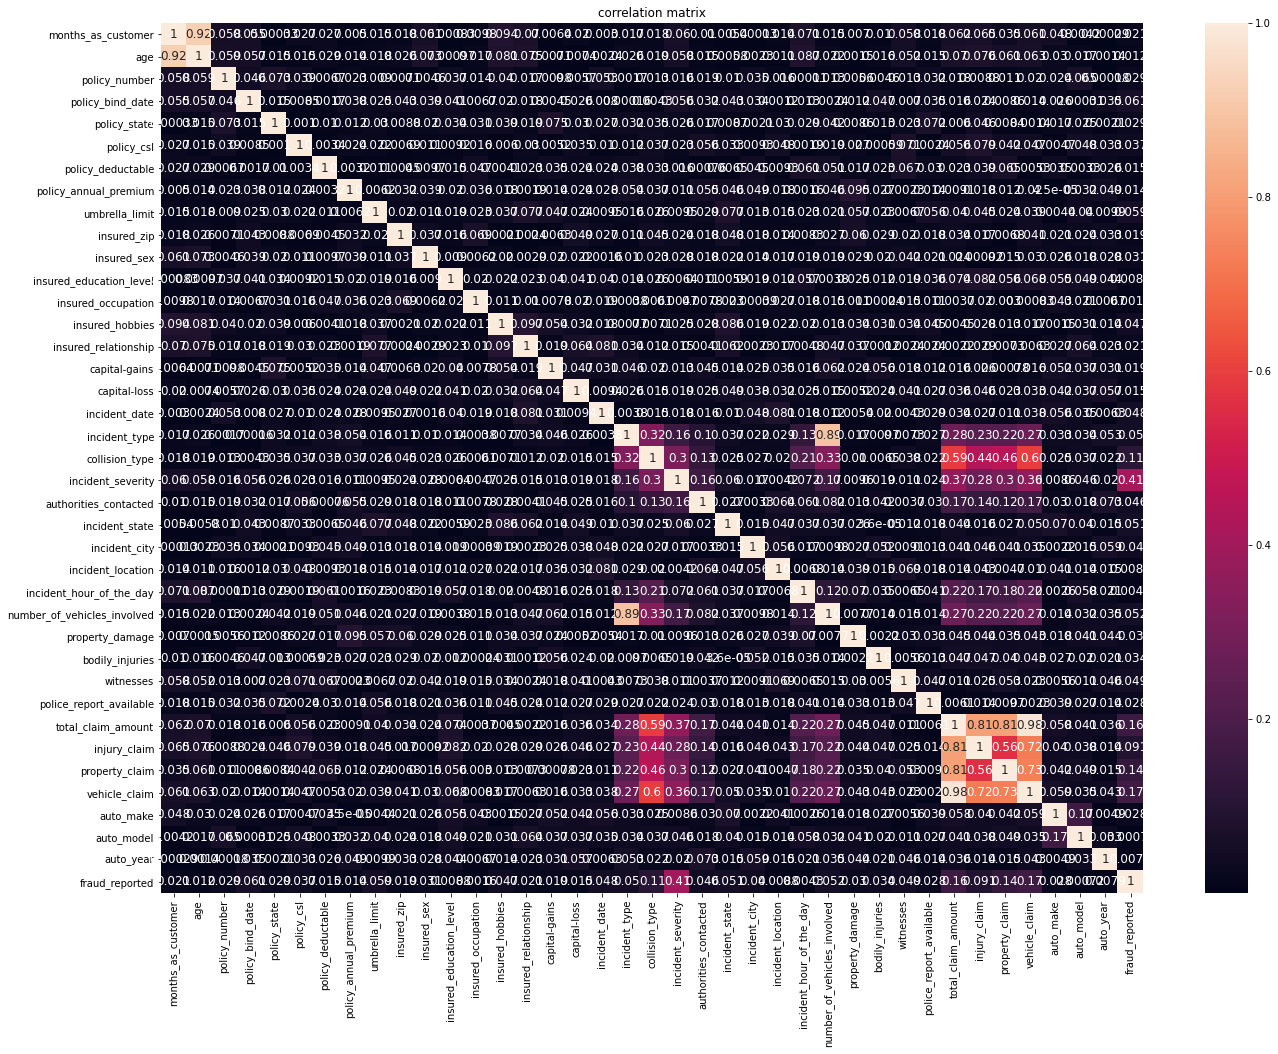

In [11]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

# Correlation of fraud_reported with respect to all the other features:


In [12]:
corr=df.corr()
corr['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


# Checking Outliers:

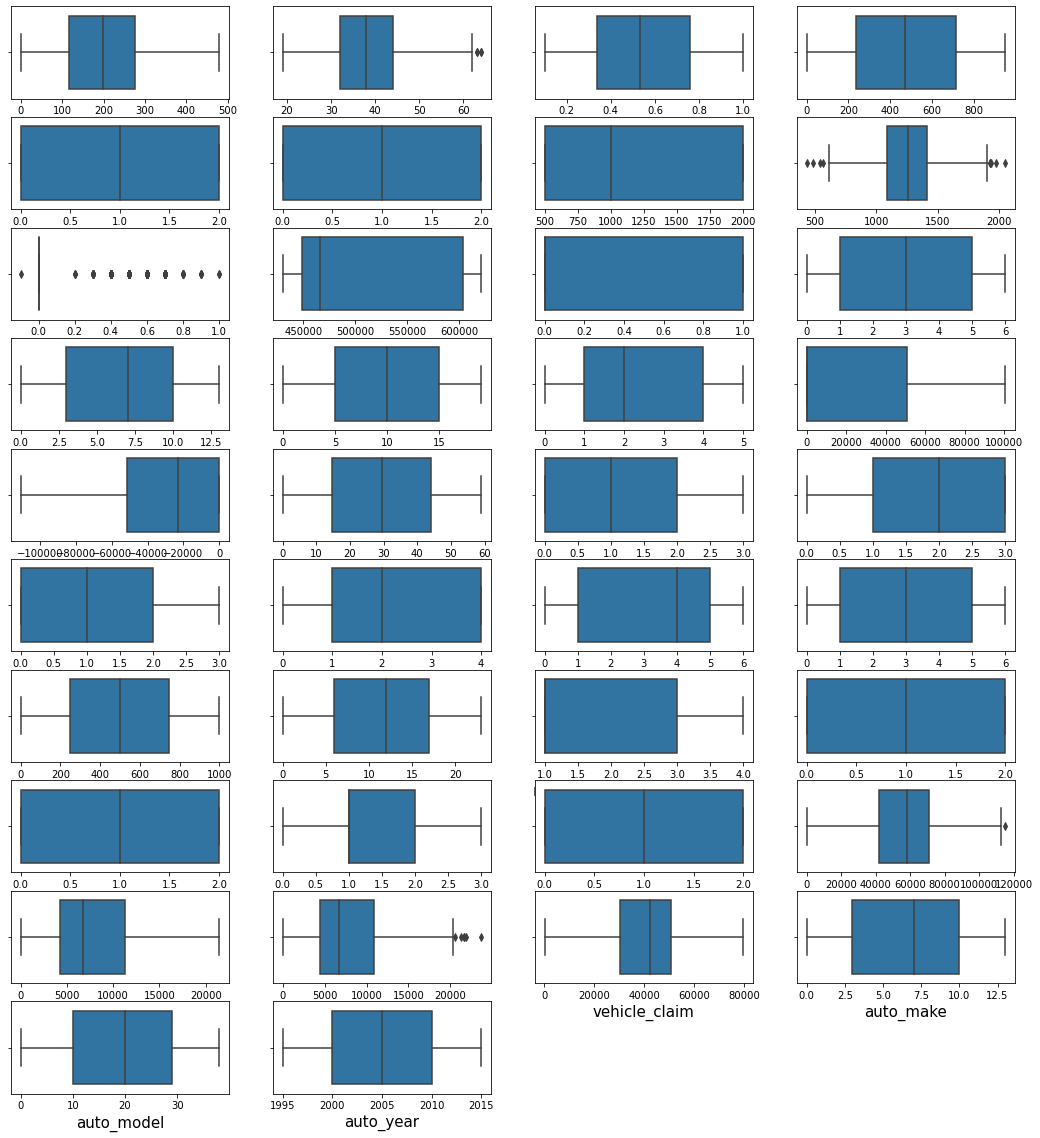

In [13]:
x=df.drop(columns=['fraud_reported'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=40:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

# Skewness:

In [14]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


# Dropping the column which has skewness:
Data which are non categorical is taken.

In [15]:
df=df.drop(columns=['umbrella_limit','insured_zip','vehicle_claim'])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,1.0,4.0,...,1,2,2.0,71610,6510,13020,10.0,1.0,2004,1
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,1.0,4.0,...,0,0,0.0,5070,780,780,8.0,12.0,2007,1
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,0.0,6.0,...,2,3,1.0,34650,7700,3850,4.0,30.0,2007,0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,0.0,6.0,...,1,2,1.0,63400,6340,6340,3.0,34.0,2014,1
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,1.0,0.0,...,0,1,1.0,6500,1300,650,0.0,31.0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0.0,5.0,...,0,1,0.0,87200,17440,8720,6.0,6.0,2006,0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0.0,6.0,...,2,3,0.0,108480,18080,18080,13.0,28.0,2015,0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,0.0,5.0,...,2,3,2.0,67500,7500,7500,11.0,19.0,1996,0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,1.0,0.0,...,0,1,2.0,46980,5220,5220,1.0,5.0,1998,0


# FEATURE SELECTION METHOD:
Since huge set of columns exists we are selecting top 25 columns for the above dataset.

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

x=df.drop('fraud_reported',axis=1)
y=df.fraud_reported

best_features=SelectKBest(score_func=f_classif,k=25)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(25,'Score')

,Feature_name,Score
18,incident_severity,196.960603
29,total_claim_amount,27.463776
31,property_claim,19.327729
17,collision_type,12.252860
30,injury_claim,8.328776
3,policy_bind_date,3.683665
24,number_of_vehicles_involved,2.689100
20,incident_state,2.644427
16,incident_type,2.539153
27,witnesses,2.451026


# Creating new dataframe:
A dataframe with feature selected top 25 columns with the target variable.

In [17]:
df_new=df[['incident_severity','total_claim_amount','property_claim','collision_type','injury_claim','policy_bind_date',
           'number_of_vehicles_involved','incident_state','incident_type','witnesses','incident_date','insured_hobbies',
           'authorities_contacted','incident_city','policy_csl','bodily_injuries','insured_sex','property_damage',
           'policy_number','policy_state','police_report_available','auto_make','insured_relationship','months_as_customer',
           'capital-gains','fraud_reported']]
df_new

,incident_severity,total_claim_amount,property_claim,collision_type,injury_claim,policy_bind_date,number_of_vehicles_involved,incident_state,incident_type,witnesses,...,insured_sex,property_damage,policy_number,policy_state,police_report_available,auto_make,insured_relationship,months_as_customer,capital-gains,fraud_reported
0,0.0,71610,13020,3.0,6510,532.0,1,4.0,2.0,2,...,1.0,2.0,521585,2.0,2.0,10.0,0.0,328,53300,1
1,1.0,5070,780,0.0,780,821.0,1,5.0,3.0,0,...,1.0,0.0,342868,1.0,0.0,8.0,2.0,228,0,1
2,1.0,34650,3850,2.0,7700,186.0,3,1.0,0.0,3,...,0.0,1.0,687698,2.0,1.0,4.0,3.0,134,35100,0
3,0.0,63400,6340,1.0,6340,766.0,1,2.0,2.0,2,...,0.0,0.0,227811,0.0,1.0,3.0,4.0,256,48900,1
4,1.0,6500,650,0.0,1300,181.0,1,1.0,3.0,1,...,1.0,1.0,367455,0.0,1.0,0.0,4.0,228,66000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,87200,8720,1.0,17440,487.0,1,0.0,2.0,1,...,0.0,2.0,941851,2.0,0.0,6.0,4.0,3,0,0
996,0.0,108480,18080,2.0,18080,129.0,1,4.0,2.0,3,...,0.0,2.0,186934,0.0,0.0,13.0,5.0,285,70900,0
997,1.0,67500,7500,3.0,7500,509.0,3,0.0,0.0,3,...,0.0,0.0,918516,2.0,2.0,11.0,2.0,130,35100,0
998,0.0,46980,5220,2.0,5220,573.0,1,1.0,2.0,1,...,1.0,0.0,533940,0.0,2.0,1.0,5.0,458,0,0


# TO REMOVE OUTLIERS:
   > # ZSCORE TECHNIQUE:

In [31]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]
df

,incident_severity,total_claim_amount,property_claim,collision_type,injury_claim,policy_bind_date,number_of_vehicles_involved,incident_state,incident_type,witnesses,...,insured_sex,property_damage,policy_number,policy_state,police_report_available,auto_make,insured_relationship,months_as_customer,capital-gains,fraud_reported
0,0.0,71610,13020,3.0,6510,532.0,1,4.0,2.0,2,...,1.0,2.0,521585,2.0,2.0,10.0,0.0,328,53300,1
1,1.0,5070,780,0.0,780,821.0,1,5.0,3.0,0,...,1.0,0.0,342868,1.0,0.0,8.0,2.0,228,0,1
2,1.0,34650,3850,2.0,7700,186.0,3,1.0,0.0,3,...,0.0,1.0,687698,2.0,1.0,4.0,3.0,134,35100,0
3,0.0,63400,6340,1.0,6340,766.0,1,2.0,2.0,2,...,0.0,0.0,227811,0.0,1.0,3.0,4.0,256,48900,1
4,1.0,6500,650,0.0,1300,181.0,1,1.0,3.0,1,...,1.0,1.0,367455,0.0,1.0,0.0,4.0,228,66000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,87200,8720,1.0,17440,487.0,1,0.0,2.0,1,...,0.0,2.0,941851,2.0,0.0,6.0,4.0,3,0,0
996,0.0,108480,18080,2.0,18080,129.0,1,4.0,2.0,3,...,0.0,2.0,186934,0.0,0.0,13.0,5.0,285,70900,0
997,1.0,67500,7500,3.0,7500,509.0,3,0.0,0.0,3,...,0.0,0.0,918516,2.0,2.0,11.0,2.0,130,35100,0
998,0.0,46980,5220,2.0,5220,573.0,1,1.0,2.0,1,...,1.0,0.0,533940,0.0,2.0,1.0,5.0,458,0,0


# checking percentage loss:

In [32]:
loss_percent=(1000-999)/1000*100
loss_percent

0.1

# Model building:

In [33]:
x=df.drop(columns='fraud_reported')
y=df.fraud_reported

# Importing necessary libraries:

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Scaling the data for ease of process:

In [36]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Finding the best random state:

In [37]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.79 Best state is:  123


# TRAIN TEST SPLIT:

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=123)


# Balacing data using Smote technique:

In [39]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

sm=SMOTE()
over_samp=SMOTE(0.80)
x_train,y_train=over_samp.fit_sample(x_train,y_train)

In [40]:
from collections import Counter # to get the count 
print(Counter(y_train))


Counter({0: 589, 1: 471})


# KNeighborsClassification Model:

In [41]:
from sklearn.metrics import classification_report
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.585
confusion_matrix: 
 [[93 70]
 [13 24]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.57      0.69       163
           1       0.26      0.65      0.37        37

    accuracy                           0.58       200
   macro avg       0.57      0.61      0.53       200
weighted avg       0.76      0.58      0.63       200



# DecisionTreeClassification Model:

In [42]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.77
confusion_matrix: 
 [[135  28]
 [ 18  19]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.83      0.85       163
           1       0.40      0.51      0.45        37

    accuracy                           0.77       200
   macro avg       0.64      0.67      0.65       200
weighted avg       0.79      0.77      0.78       200



# LogisticRegression Model:

In [43]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.735
confusion_matrix: 
 [[122  41]
 [ 12  25]]
classification report:                precision    recall  f1-score   support

           0       0.91      0.75      0.82       163
           1       0.38      0.68      0.49        37

    accuracy                           0.73       200
   macro avg       0.64      0.71      0.65       200
weighted avg       0.81      0.73      0.76       200



# RandomForestClassification Model:

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.82
confusion_matrix: 
 [[145  18]
 [ 18  19]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.89      0.89       163
           1       0.51      0.51      0.51        37

    accuracy                           0.82       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.82      0.82      0.82       200



# CROSS VALIDATION SCORE:

In [45]:
pred_test=clf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)
for i in range(2,10):
    lsscore=cross_val_score(clf,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 77.97755511022044
acc_score- 82.0
at cv:- 3
cv score- 78.67867867867866
acc_score- 82.0
at cv:- 4
cv score- 79.08032128514057
acc_score- 82.0
at cv:- 5
cv score- 78.38040201005026
acc_score- 82.0
at cv:- 6
cv score- 76.88057619700359
acc_score- 82.0
at cv:- 7
cv score- 78.48419186447356
acc_score- 82.0
at cv:- 8
cv score- 78.6766129032258
acc_score- 82.0
at cv:- 9
cv score- 78.57857857857859
acc_score- 82.0


# CHECKING CV FOR ALL THE MODELS:

In [51]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=4)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.7367269076305221


In [52]:
csv=cross_val_score(clf1,x_scaled,y,cv=4)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.7747871485943776


In [53]:
csv=cross_val_score(lr,x_scaled,y,cv=4)
print('cross validation score of logistic regression model is:',csv.mean())

cross validation score of logistic regression model is: 0.7757991967871487


In [54]:
csv=cross_val_score(clf,x_scaled,y,cv=4)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.7888032128514058


# Out of all the 4 models randomforest classifier model is performing well,so we consider this MODEL:

# HYPER PARAMETER TUNING:

In [55]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [56]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10}


In [57]:
accuracy_score(y_test,gri_pred)

0.835

# SAVING THE MODEL:

In [58]:
import pickle
filename='fraud_reported.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [59]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
195,1,1
196,0,0
197,1,1
198,0,0
